In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10, 5)

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace = True, axis = 1)
df.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3


In [4]:
df = df.rename(columns = {'State/UnionTerritory':'State', 'Cured':'Recovered'})
df.head()

,Sno,Date,Time,State,Recovered,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3


In [5]:
df.drop(['Sno'], inplace = True, axis = 1)
df.head()

,Date,Time,State,Recovered,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [6]:
df['Time'].unique()

array(['6:00 PM', '10:00 AM', '7:30 PM', '9:30 PM', '8:30 PM', '5:00 PM',
       '8:00 AM'], dtype=object)

In [7]:
df['Time_24'] = df['Time'].apply(lambda s: s.split(' ')[0].replace(s.split(':')[0], str(int(s.split(':')[0])+12)) if s[-2:] == 'PM' else s.split(' ')[0])
df.head()

,Date,Time,State,Recovered,Deaths,Confirmed,Time_24
0,2020-01-30,6:00 PM,Kerala,0,0,1,18:00
1,2020-01-31,6:00 PM,Kerala,0,0,1,18:00
2,2020-02-01,6:00 PM,Kerala,0,0,2,18:00
3,2020-02-02,6:00 PM,Kerala,0,0,3,18:00
4,2020-02-03,6:00 PM,Kerala,0,0,3,18:00


In [8]:
df['DateTime'] = df.Date + ' ' + df.Time_24
df.head()

,Date,Time,State,Recovered,Deaths,Confirmed,Time_24,DateTime
0,2020-01-30,6:00 PM,Kerala,0,0,1,18:00,2020-01-30 18:00
1,2020-01-31,6:00 PM,Kerala,0,0,1,18:00,2020-01-31 18:00
2,2020-02-01,6:00 PM,Kerala,0,0,2,18:00,2020-02-01 18:00
3,2020-02-02,6:00 PM,Kerala,0,0,3,18:00,2020-02-02 18:00
4,2020-02-03,6:00 PM,Kerala,0,0,3,18:00,2020-02-03 18:00


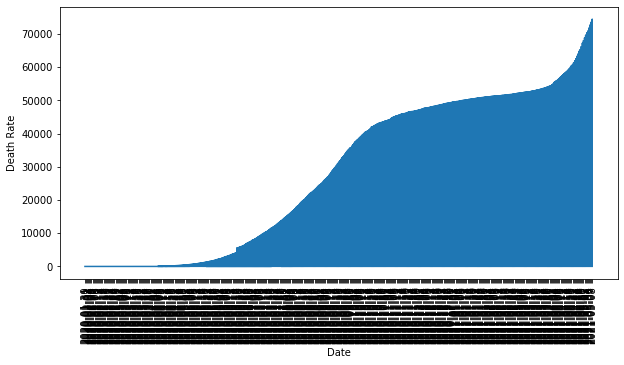

In [9]:
x = df.Date
y = df.Deaths
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.xticks(rotation = 'vertical')
plt.plot(x, y)

In [10]:
df['Deaths'].max()

74413

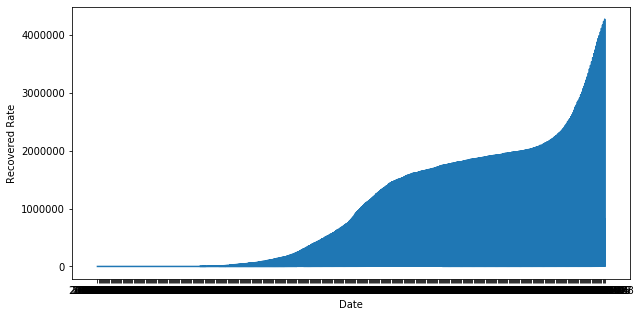

In [11]:
plt.xlabel('Date')
plt.ylabel('Recovered Rate')
plt.plot(df.Date, df.Recovered)

In [12]:
df['Recovered'].max()

4265326

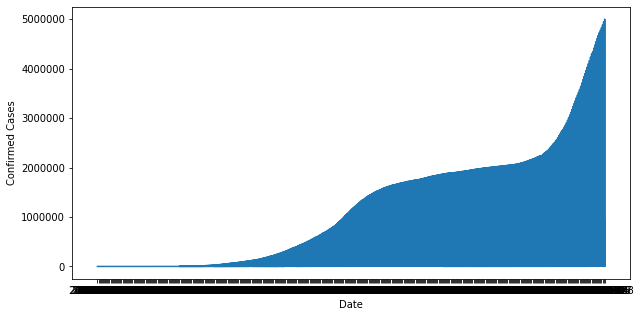

In [13]:
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.plot(df['Date'], df['Confirmed'])

In [14]:
df.head()

,Date,Time,State,Recovered,Deaths,Confirmed,Time_24,DateTime
0,2020-01-30,6:00 PM,Kerala,0,0,1,18:00,2020-01-30 18:00
1,2020-01-31,6:00 PM,Kerala,0,0,1,18:00,2020-01-31 18:00
2,2020-02-01,6:00 PM,Kerala,0,0,2,18:00,2020-02-01 18:00
3,2020-02-02,6:00 PM,Kerala,0,0,3,18:00,2020-02-02 18:00
4,2020-02-03,6:00 PM,Kerala,0,0,3,18:00,2020-02-03 18:00


In [15]:
df = df.drop(['Time', 'Date', 'Time_24'], axis = 1)
df.head()

,State,Recovered,Deaths,Confirmed,DateTime
0,Kerala,0,0,1,2020-01-30 18:00
1,Kerala,0,0,1,2020-01-31 18:00
2,Kerala,0,0,2,2020-02-01 18:00
3,Kerala,0,0,3,2020-02-02 18:00
4,Kerala,0,0,3,2020-02-03 18:00


In [16]:
df.dtypes

State        object
Recovered     int64
Deaths        int64
Confirmed     int64
DateTime     object
dtype: object

In [17]:
df['DateTime'] = pd.to_datetime(df.DateTime)
df.head()

,State,Recovered,Deaths,Confirmed,DateTime
0,Kerala,0,0,1,2020-01-30 18:00:00
1,Kerala,0,0,1,2020-01-31 18:00:00
2,Kerala,0,0,2,2020-02-01 18:00:00
3,Kerala,0,0,3,2020-02-02 18:00:00
4,Kerala,0,0,3,2020-02-03 18:00:00


In [18]:
df.dtypes

State                object
Recovered             int64
Deaths                int64
Confirmed             int64
DateTime     datetime64[ns]
dtype: object

In [19]:
df.DateTime.dt.hour.head()

0    18
1    18
2    18
3    18
4    18
Name: DateTime, dtype: int64

In [20]:
df.DateTime.dt.year.head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: DateTime, dtype: int64

In [21]:
df.DateTime.dt.month.head()

0    1
1    1
2    2
3    2
4    2
Name: DateTime, dtype: int64

In [22]:
df.DateTime.dt.day.head()

0    30
1    31
2     1
3     2
4     3
Name: DateTime, dtype: int64

In [23]:
df['Days'] = df.DateTime.dt.day
df['Months'] = df.DateTime.dt.month
df['Years'] = df.DateTime.dt.year
df['Hours'] = df.DateTime.dt.hour
df['Minutes'] = df.DateTime.dt.minute
df.head()

,State,Recovered,Deaths,Confirmed,DateTime,Days,Months,Years,Hours,Minutes
0,Kerala,0,0,1,2020-01-30 18:00:00,30,1,2020,18,0
1,Kerala,0,0,1,2020-01-31 18:00:00,31,1,2020,18,0
2,Kerala,0,0,2,2020-02-01 18:00:00,1,2,2020,18,0
3,Kerala,0,0,3,2020-02-02 18:00:00,2,2,2020,18,0
4,Kerala,0,0,3,2020-02-03 18:00:00,3,2,2020,18,0


In [24]:
df = df.drop('DateTime', axis = 1)
df.head()

,State,Recovered,Deaths,Confirmed,Days,Months,Years,Hours,Minutes
0,Kerala,0,0,1,30,1,2020,18,0
1,Kerala,0,0,1,31,1,2020,18,0
2,Kerala,0,0,2,1,2,2020,18,0
3,Kerala,0,0,3,2,2,2020,18,0
4,Kerala,0,0,3,3,2,2020,18,0


In [25]:
# Checking for null data
df.isnull().sum()

State        0
Recovered    0
Deaths       0
Confirmed    0
Days         0
Months       0
Years        0
Hours        0
Minutes      0
dtype: int64

In [26]:
df.head()

,State,Recovered,Deaths,Confirmed,Days,Months,Years,Hours,Minutes
0,Kerala,0,0,1,30,1,2020,18,0
1,Kerala,0,0,1,31,1,2020,18,0
2,Kerala,0,0,2,1,2,2020,18,0
3,Kerala,0,0,3,2,2,2020,18,0
4,Kerala,0,0,3,3,2,2020,18,0


In [27]:
# Dummy data for state
state_dummy = pd.get_dummies(df['State'])
state_dummy.head()

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Cases being reassigned to states,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Daman & Diu,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = pd.concat([df, state_dummy], axis = 1)
df.head()

,State,Recovered,Deaths,Confirmed,Days,Months,Years,Hours,Minutes,Andaman and Nicobar Islands,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,Kerala,0,0,1,30,1,2020,18,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kerala,0,0,1,31,1,2020,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kerala,0,0,2,1,2,2020,18,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kerala,0,0,3,2,2,2020,18,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kerala,0,0,3,3,2,2020,18,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = df.drop('State', axis = 1)
df.head()

,Recovered,Deaths,Confirmed,Days,Months,Years,Hours,Minutes,Andaman and Nicobar Islands,Andhra Pradesh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,1,30,1,2020,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,31,1,2020,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1,2,2020,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,2,2,2020,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,3,2,2020,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Features or Input Data
X = df.drop(['Recovered', 'Deaths', 'Confirmed'], axis = 1)
X.head()

,Days,Months,Years,Hours,Minutes,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,30,1,2020,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1,2020,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,2020,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2020,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,2020,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Labels or output
Y = df[['Recovered', 'Deaths', 'Confirmed']]
Y.head()

,Recovered,Deaths,Confirmed
0,0,0,1
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,3


# MODEL BUILDING

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 

In [34]:
print('Number of Input Training Data : ',len(X_train))
print('Number of Input Testing Data : ',len(X_test))
print('Number of Output Training Data : ',len(Y_train))
print('Number of Output Testing Data : ',len(Y_test))

Number of Input Training Data :  11752
Number of Input Testing Data :  2938
Number of Output Training Data :  11752
Number of Output Testing Data :  2938


In [35]:
# NOW I AM GOING TO TRAIN MACHINE BY DATASET
from sklearn.linear_model import LinearRegression 

In [36]:
reg = LinearRegression()   # reg is an object of class LinearRegression

reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
reg.predict(X_test)

array([[ 293358.5      ,    2740.609375 ,  312563.       ],
       [ 337051.       ,    2205.3203125,  355271.       ],
       [ 199760.5      ,    2604.0546875,  212630.5      ],
       ...,
       [-130790.       ,   -1780.96875  , -140782.       ],
       [-108110.5      ,   -1568.015625 , -118145.5      ],
       [-137384.       ,   -1623.6484375, -147966.5      ]])

In [42]:
reg.score(X_test, Y_test)

C:\Users\Akshay Sharma\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6301988947933854